In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
aluguel = pd.read_csv("C:/Users/conta/OneDrive/Desktop/Projeto Estágio FJG/aluguel.csv")
'''aluguel_quinto_andar = pd.read_excel("C:/Users/conta/OneDrive/Desktop/Projeto Estágio FJG/alugueis_quinto_andar.xlsx")'''

'aluguel_quinto_andar = pd.read_excel("C:/Users/conta/OneDrive/Desktop/Projeto Estágio FJG/alugueis_quinto_andar.xlsx")'

In [4]:
aluguel.head(10)

,URL,Tipo,Rua,Bairro,Cidade,Área,Quartos,Banheiros,Garagem,Aluguel,Condomínio,IPTU,Seguro Incêndio,Taxa de Serviço,Total,Código
0,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,"R$ 1.000,00","R$ 120,00","R$ 32,00","R$ 13,00",-,"R$ 1.165,00",1452928
1,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,"R$ 1.000,00","R$ 120,00","R$ 32,00","R$ 13,00",-,"R$ 1.165,00",1452928
2,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,"R$ 1.000,00","R$ 120,00","R$ 32,00","R$ 13,00",-,"R$ 1.165,00",1452928
3,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,"R$ 1.100,00","R$ 120,00","R$ 36,00","R$ 15,00",-,"R$ 1.271,00",1458006
4,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,"R$ 1.100,00","R$ 120,00","R$ 36,00","R$ 15,00",-,"R$ 1.271,00",1458006
5,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,"R$ 1.100,00","R$ 120,00","R$ 36,00","R$ 15,00",-,"R$ 1.271,00",1458006
6,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,"R$ 900,00",Incluso,"R$ 0,00","R$ 12,00","R$ 23,00","R$ 935,00",1463887
7,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,"R$ 900,00",Incluso,"R$ 0,00","R$ 12,00","R$ 23,00","R$ 935,00",1463887
8,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,"R$ 900,00",Incluso,"R$ 0,00","R$ 12,00","R$ 23,00","R$ 935,00",1463887
9,https://www.quintoandar.com.br/imovel/89327299...,Casa,Rua Figueiredo Pimentel,Abolição,Rio de Janeiro,70,2,2,2 vagas,"R$ 1.325,00","R$ 190,00","R$ 144,00","R$ 23,00","R$ 34,00","R$ 1.716,00",572994


In [5]:
aluguel.count()

URL                1609
Tipo               1609
Rua                1609
Bairro             1609
Cidade             1609
Área               1609
Quartos            1609
Banheiros          1609
Garagem            1609
Aluguel            1609
Condomínio         1609
IPTU               1609
Seguro Incêndio    1609
Taxa de Serviço    1609
Total              1609
Código             1609
dtype: int64

In [6]:
aluguel.duplicated().sum()

692

In [7]:
'''1. Remova os anúncios duplicados'''

aluguel.drop_duplicates(inplace=True)

In [8]:
aluguel.duplicated().sum()

0

In [9]:
aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 1605
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   URL              917 non-null    object
 1   Tipo             917 non-null    object
 2   Rua              917 non-null    object
 3   Bairro           917 non-null    object
 4   Cidade           917 non-null    object
 5   Área             917 non-null    int64 
 6   Quartos          917 non-null    int64 
 7   Banheiros        917 non-null    int64 
 8   Garagem          917 non-null    object
 9   Aluguel          917 non-null    object
 10  Condomínio       917 non-null    object
 11  IPTU             917 non-null    object
 12  Seguro Incêndio  917 non-null    object
 13  Taxa de Serviço  917 non-null    object
 14  Total            917 non-null    object
 15  Código           917 non-null    int64 
dtypes: int64(4), object(12)
memory usage: 121.8+ KB


In [10]:
"""
Descrição: O R$ foi retirado e as colunas foram convertidas para tipo float, assim possibilitando o calculo da nova coluna(valor_m2).
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


colunas = ['Aluguel', 'Condomínio', 'IPTU', 'Seguro Incêndio', 'Taxa de Serviço', 'Total']

aluguel[colunas] = (aluguel[colunas].replace('R\$', '', regex=True).replace('\.', '', regex=True).replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce'))

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\.'
C:\Users\conta\AppData\Local\Temp\ipykernel_20440\1811434757.py:10: SyntaxWarning: invalid escape sequence '\$'
  aluguel[colunas] = (aluguel[colunas].replace('R\$', '', regex=True).replace('\.', '', regex=True).replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce'))
C:\Users\conta\AppData\Local\Temp\ipykernel_20440\1811434757.py:10: SyntaxWarning: invalid escape sequence '\.'
  aluguel[colunas] = (aluguel[colunas].replace('R\$', '', regex=True).replace('\.', '', regex=True).replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce'))


In [11]:
aluguel.head()

,URL,Tipo,Rua,Bairro,Cidade,Área,Quartos,Banheiros,Garagem,Aluguel,Condomínio,IPTU,Seguro Incêndio,Taxa de Serviço,Total,Código
0,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,1000.0,120.0,32.0,13.0,NaN,1165.0,1452928
3,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,1100.0,120.0,36.0,15.0,NaN,1271.0,1458006
6,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,900.0,NaN,0.0,12.0,23.0,935.0,1463887
9,https://www.quintoandar.com.br/imovel/89327299...,Casa,Rua Figueiredo Pimentel,Abolição,Rio de Janeiro,70,2,2,2 vagas,1325.0,190.0,144.0,23.0,34.0,1716.0,572994
11,https://www.quintoandar.com.br/imovel/89416109...,Apartamento,Rua Braulio Muniz,Abolição,Rio de Janeiro,60,2,2,-,1500.0,500.0,70.0,20.0,38.0,2128.0,1461090


In [12]:
"""
Descrição: Calculo na criação de uma nova coluna (valor_m2).
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

aluguel['valor_m2'] = aluguel['Total'] / aluguel['Área']

In [13]:
aluguel.head(3)

,URL,Tipo,Rua,Bairro,Cidade,Área,Quartos,Banheiros,Garagem,Aluguel,Condomínio,IPTU,Seguro Incêndio,Taxa de Serviço,Total,Código,valor_m2
0,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,1000.0,120.0,32.0,13.0,NaN,1165.0,1452928,21.574074
3,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,1100.0,120.0,36.0,15.0,NaN,1271.0,1458006,22.696429
6,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,900.0,NaN,0.0,12.0,23.0,935.0,1463887,23.375000


In [14]:
"""
Descrição: Retirando as casas decimais para uma melhor visualização
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


aluguel['valor_m2'] = aluguel['valor_m2'].round(2)

In [15]:
aluguel.head(3)

,URL,Tipo,Rua,Bairro,Cidade,Área,Quartos,Banheiros,Garagem,Aluguel,Condomínio,IPTU,Seguro Incêndio,Taxa de Serviço,Total,Código,valor_m2
0,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,1000.0,120.0,32.0,13.0,NaN,1165.0,1452928,21.57
3,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,1100.0,120.0,36.0,15.0,NaN,1271.0,1458006,22.70
6,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,900.0,NaN,0.0,12.0,23.0,935.0,1463887,23.38


In [16]:
"""
Descrição: No caso, na tarefa de retirar o R$ já tinha limpado o '-', então só foi preciso colocar o 0 em valores ausentes.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


aluguel.fillna(0, inplace=True)

In [17]:
aluguel.head()

,URL,Tipo,Rua,Bairro,Cidade,Área,Quartos,Banheiros,Garagem,Aluguel,Condomínio,IPTU,Seguro Incêndio,Taxa de Serviço,Total,Código,valor_m2
0,https://www.quintoandar.com.br/imovel/89415292...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,54,2,1,-,1000.0,120.0,32.0,13.0,0.0,1165.0,1452928,21.57
3,https://www.quintoandar.com.br/imovel/89415800...,Apartamento,Rua da Abolição,Abolição,Rio de Janeiro,56,2,1,-,1100.0,120.0,36.0,15.0,0.0,1271.0,1458006,22.70
6,https://www.quintoandar.com.br/imovel/89416388...,Studio,Rua Figueiredo Pímentel,Abolição,Rio de Janeiro,40,1,1,-,900.0,0.0,0.0,12.0,23.0,935.0,1463887,23.38
9,https://www.quintoandar.com.br/imovel/89327299...,Casa,Rua Figueiredo Pimentel,Abolição,Rio de Janeiro,70,2,2,2 vagas,1325.0,190.0,144.0,23.0,34.0,1716.0,572994,24.51
11,https://www.quintoandar.com.br/imovel/89416109...,Apartamento,Rua Braulio Muniz,Abolição,Rio de Janeiro,60,2,2,-,1500.0,500.0,70.0,20.0,38.0,2128.0,1461090,35.47


In [18]:
'''Contagem de anuncios por Bairro'''

quantidade_anuncios = aluguel.groupby('Bairro')['Código'].count()
print(quantidade_anuncios)

Bairro
Abolição            5
Andaraí             5
Anil               17
Barra da Tijuca    58
Benfica             1
                   ..
Vila Isabel        12
Vila Valqueire     15
Vila da Penha       8
Vista Alegre        1
Zumbi               3
Name: Código, Length: 98, dtype: int64


In [19]:
'''Preço total médio por bairro'''
preco_medio_bairro = aluguel.groupby('Bairro')['Total'].mean()
preco_medio_bairro.head().round(2)

Bairro
Abolição           1443.00
Andaraí            2564.80
Anil               2685.12
Barra da Tijuca    8979.52
Benfica            2527.00
Name: Total, dtype: float64

In [20]:
'''Área média por bairro'''
area_media_bairro = aluguel.groupby('Bairro')['Área'].mean()
area_media_bairro.head().round(2)

Bairro
Abolição            56.00
Andaraí             78.60
Anil                97.88
Barra da Tijuca    143.41
Benfica             50.00
Name: Área, dtype: float64

In [21]:
'''Preço/m² médio por bairro'''
preco_m2_medio_bairro = aluguel.groupby('Bairro')['valor_m2'].mean()
preco_m2_medio_bairro.head().round(2)

Bairro
Abolição           25.53
Andaraí            33.84
Anil               31.60
Barra da Tijuca    77.31
Benfica            50.54
Name: valor_m2, dtype: float64

In [22]:
"""
Descrição: Modificando o tipo das tabelas para ser possível fazer a junção.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


quantidade_anuncios = quantidade_anuncios.to_frame()
area_media_bairro = area_media_bairro.to_frame()
preco_m2_medio_bairro = preco_m2_medio_bairro.to_frame()
preco_medio_bairro = preco_medio_bairro.to_frame()

In [23]:
"""
Descrição: Primeiro foi feito um INNER JOIN entre as tabelas criadas anteriormente, e depois foi salvo na variável dados1.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


dados1 = quantidade_anuncios.merge(area_media_bairro, on='Bairro', how='inner') \
               .merge(preco_m2_medio_bairro, on='Bairro', how='inner') \
               .merge(preco_medio_bairro, on='Bairro', how='inner')

In [24]:
"""
Descrição: Indexando o novo dataframe
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


dados1 = dados1.reset_index()

In [25]:
dados1.head(5)

,Bairro,Código,Área,valor_m2,Total
0,Abolição,5,56.000000,25.526000,1443.000000
1,Andaraí,5,78.600000,33.844000,2564.800000
2,Anil,17,97.882353,31.602941,2685.117647
3,Barra da Tijuca,58,143.413793,77.311207,8979.517241
4,Benfica,1,50.000000,50.540000,2527.000000


In [26]:
"""
Descrição: Modificação do nome das colunas.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


dados1 = dados1.rename(columns={'Código': 'total_de_anuncios', 'Área': 'media_por_area', 'Total': 'media_preco_aluguel'})

In [27]:
"""
Descrição: Os cinco bairros com a maior média de aluguel.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

top5_maiores = dados1.sort_values(by='media_preco_aluguel', ascending=False).head(10)[['Bairro', 'media_preco_aluguel']]
print(top5_maiores)

              Bairro  media_preco_aluguel
38         Itanhangá         13626.750000
79       São Conrado         12852.166667
44               Joá         12129.500000
32             Gávea          9586.666667
45             Lagoa          9296.125000
40   Jardim Botânico          9197.769231
3    Barra da Tijuca          8979.517241
47            Leblon          8885.866667
87              Urca          7598.800000
42  Jardim Guanabara          6879.214286


In [28]:
"""
Descrição: Os cinco bairros com a menor média de aluguel.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

top5_menores = dados1.sort_values(by='media_preco_aluguel', ascending=True).head(10)[['Bairro', 'media_preco_aluguel']]
print(top5_menores)

                 Bairro  media_preco_aluguel
96         Vista Alegre           779.000000
10               Cacuia           913.000000
49  Lins de Vasconcelos          1008.000000
78           Santíssimo          1102.000000
20             Cordovil          1182.500000
92        Vigário Geral          1200.000000
63              Pilares          1211.666667
57         Oswaldo Cruz          1221.100000
66    Praia da Bandeira          1231.500000
90             Vaz Lobo          1245.333333


In [29]:
"""
Descrição: Os cinco bairros com maior preço médio por m².
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

top5_maiores_m2 = dados1.sort_values(by='valor_m2', ascending=False).head(10)[['Bairro', 'valor_m2']]
print(top5_maiores_m2)

             Bairro    valor_m2
36          Ipanema  113.608571
47           Leblon  104.241333
40  Jardim Botânico   92.157692
27         Flamengo   80.395556
32            Gávea   79.382500
3   Barra da Tijuca   77.311207
19       Copacabana   74.928704
29           Glória   72.121429
48             Leme   71.328000
34          Humaitá   71.007500


In [30]:
"""
Descrição: Os cinco bairros com menor preço médio por m².
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

top5_menores_m2 = dados1.sort_values(by='valor_m2', ascending=True).head(10)[['Bairro', 'valor_m2']]
print(top5_menores_m2)

               Bairro   valor_m2
92      Vigário Geral  12.000000
90           Vaz Lobo  14.700000
53     Maria da Graça  19.075000
8        Brás de Pina  19.182143
69  Quintino Bocaiuva  19.933333
15            Catumbi  20.830000
38          Itanhangá  21.392500
12       Campo Grande  21.593043
67         Praça Seca  21.830000
33       Higienópolis  21.866667


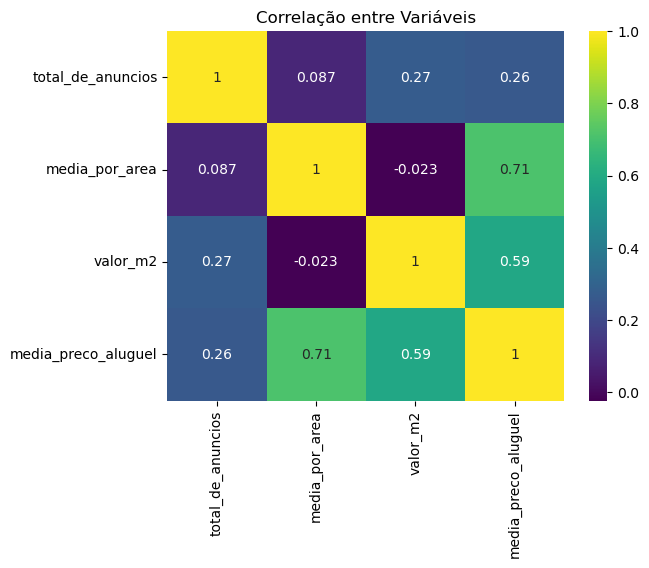

In [31]:
"""
Descrição: Com base na demostração gráfica, podemos ver uma forte correlão entre preço médio de aluguel com média de área, seguida de média M². Então podemos chegar a conclusão que quanto maior a área do imovel, maior será o preço do aluguel.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

correlacao = dados1[['total_de_anuncios', 'media_por_area', 'valor_m2', 'media_preco_aluguel']].corr()
sns.heatmap(correlacao, annot=True, cmap='viridis')
plt.title('Correlação entre Variáveis')
plt.show()

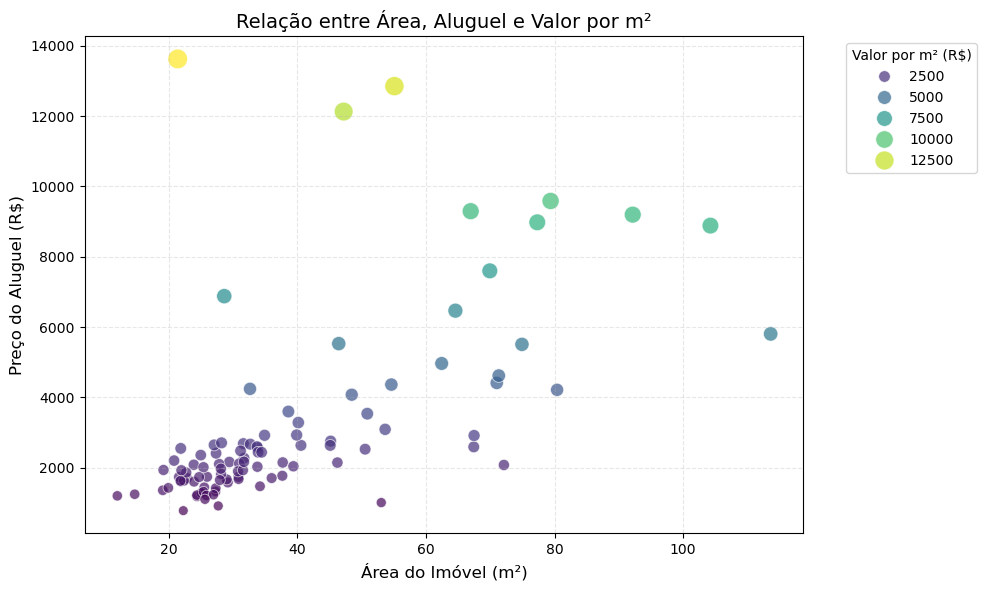

In [32]:
"""
Descrição: Verificando a correlação do aluguel com M²
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""


plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados1, x=dados1['valor_m2'], y=dados1['media_preco_aluguel'],
hue=dados1['media_preco_aluguel'], 
palette='viridis',
size=dados1['media_preco_aluguel'], 
sizes=(50, 200),   
alpha=0.7  
)
plt.title('Relação entre Área, Aluguel e Valor por m²', fontsize=14)
plt.xlabel('Área do Imóvel (m²)', fontsize=12)
plt.ylabel('Preço do Aluguel (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

plt.legend(title='Valor por m² (R$)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
"""
Descrição: Filtrei informações das colunas Bairro e Total, colocando na varivel dados2.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

dados2 = aluguel.groupby('Bairro')['Total'].sum()

In [34]:
dados2 = dados2.to_frame()
dados2 = dados2.reset_index()

In [35]:
dados2.head(10)

,Bairro,Total
0,Abolição,7215.0
1,Andaraí,12824.0
2,Anil,45647.0
3,Barra da Tijuca,520812.0
4,Benfica,2527.0
5,Bento Ribeiro,17731.0
6,Bonsucesso,24379.0
7,Botafogo,84071.0
8,Brás de Pina,27095.0
9,Cachambi,23795.0


C:\Users\conta\AppData\Local\Temp\ipykernel_20440\2434547793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados2.head(10).sort_values(by='Total', ascending=False),


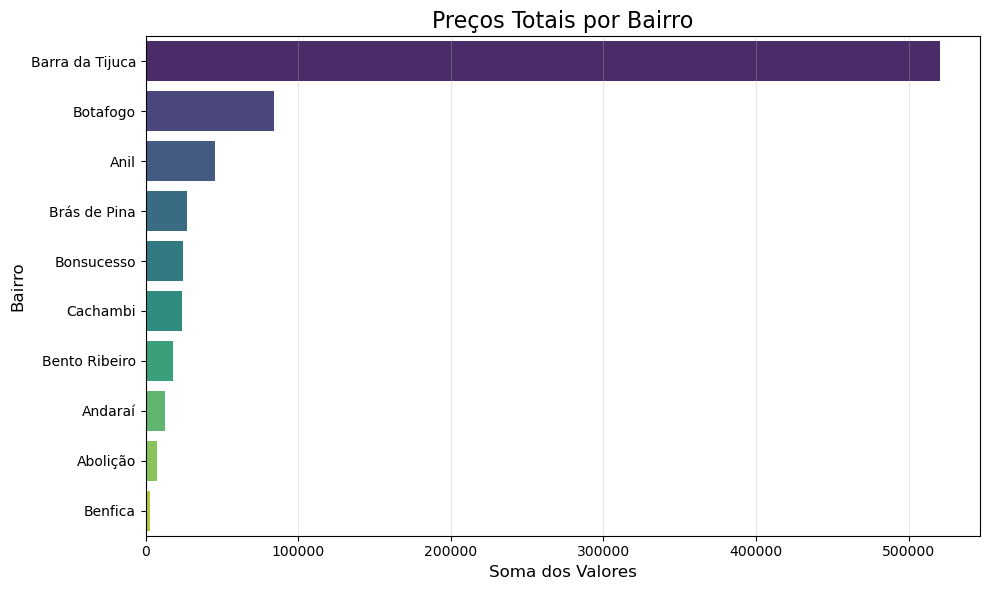

In [36]:
"""
Descrição: Apresentação do gráfico com dados agrupados no dataframe dados2.
Autor: Matheus dos Anjos
Data: [20/05/2025]
"""

#Sobre a questão 8 ->
#Gráfico de Pizza não é adequado para grande número de informações (utilizo para no máximo 3). Por isso optei pelo gráfico de barras, onde a informação ficou mais evidente e de facil interpretação.


plt.figure(figsize=(10, 6))
sns.barplot(data=dados2.head(10).sort_values(by='Total', ascending=False),
    y='Bairro',
    x='Total',
    palette='viridis')

plt.title('Preços Totais por Bairro', fontsize=16)
plt.xlabel('Soma dos Valores', fontsize=12)
plt.ylabel('Bairro', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [37]:
'''dados1.to_csv('dados1.csv', index=False, encoding='utf-8-sig', sep=',')
dados2.to_csv('dados2.csv', index=False, encoding='utf-8-sig', sep=',')'''

"dados1.to_csv('dados1.csv', index=False, encoding='utf-8-sig', sep=',')\ndados2.to_csv('dados2.csv', index=False, encoding='utf-8-sig', sep=',')"